In [1]:
import numpy as np
import pandas as pd
import napari
from napari import Viewer
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects
from skimage.measure import regionprops_table
from magicgui import magicgui

import matplotlib.pyplot as plt
import pyqtgraph as pg

In [2]:
# preparation to display a test image and some labels

coins = data.coins()[50:-50, 50:-50]
# apply threshold
thresh = threshold_otsu(coins)
bw = closing(coins > thresh, square(4))
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 20)
# label image regions
label_image = label(cleared)

# create the viewer and add the coins image
viewer = napari.view_image(coins, name='coins')
# add the labels
labels_layer = viewer.add_labels(label_image, name='segmentation')

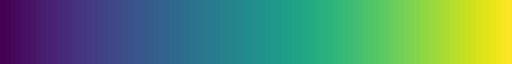

In [3]:
# define color resolution
color_number = 100 #napari may not render correctly above 1024 colors

# get expected number of colors from the colormap
colormap = plt.get_cmap('viridis',color_number)
colormap

In [4]:
# get some properties of the labels
df = pd.DataFrame(regionprops_table(label_image, properties=('label', 'area', 'eccentricity')))
df['area_norm'] = ((df['area']- df['area'].min())/(df['area'].max() - df['area'].min()) * color_number).astype(int)
df['eccentricity_norm'] = ((df['eccentricity']- df['eccentricity'].min())/(df['eccentricity'].max() - df['eccentricity'].min()) * color_number).astype(int)
df

,label,area,eccentricity,area_norm,eccentricity_norm
0,1,1895,0.347067,100,44
1,2,1212,0.375623,13,57
2,3,1124,0.350960,2,46
3,4,1102,0.447403,0,90
4,5,1720,0.253556,77,1
5,6,1519,0.467104,52,100
6,7,1475,0.263275,47,5
7,8,1155,0.251265,6,0


In [5]:
# color labels by area
color_dict = {}
color_dict[0] = [0,0,0,0]
for i in range(1, 9):
    color_dict[i] = colormap(df.loc[df.label==i,'area_norm'])

labels_layer.color = color_dict

In [6]:
from PyQt5.QtWidgets import QApplication
from pyqtgraph_test import CustomPlot
import pyqtgraph_test as pt

In [7]:
pt.viewer = viewer

In [8]:
app = QApplication([])
win = pg.GraphicsLayoutWidget(show=True)
customPlot = CustomPlot(xx=df['area'], yy=df['eccentricity'],org_brush = [(np.array(colormap(df.loc[x,'area_norm']))*255).astype(int) for x in range(len(df))])
win.addItem(customPlot)

customPlot.setLabel('bottom', "area")
customPlot.setLabel('left', "eccentricity")

viewer.window.add_dock_widget(win,area='bottom')

c:\Users\lab\anaconda3\envs\napari-env\lib\site-packages\napari\utils\colormaps\standardize_color.py:296: UserWarning: Colors with values larger than one detected. napari will normalize these colors for you. If you'd like to convert these yourself, please use the proper method from skimage.color.
  warnings.warn(
c:\Users\lab\anaconda3\envs\napari-env\lib\site-packages\napari\utils\colormaps\standardize_color.py:296: UserWarning: Colors with values larger than one detected. napari will normalize these colors for you. If you'd like to convert these yourself, please use the proper method from skimage.color.
  warnings.warn(
c:\Users\lab\anaconda3\envs\napari-env\lib\site-packages\napari\utils\colormaps\standardize_color.py:296: UserWarning: Colors with values larger than one detected. napari will normalize these colors for you. If you'd like to convert these yourself, please use the proper method from skimage.color.
  warnings.warn(
c:\Users\lab\anaconda3\envs\napari-env\lib\site-package